# feature selection 시각화

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'malgun gothic'

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
lasso_30 = pd.read_csv(r'..\..\..\Code\SH\2. feature selection\lasso_30_for visualization.csv', index_col=0)
total_60 = pd.read_csv(r'..\..\..\Code\SH\2. feature selection\lasso_feature_all.csv', index_col=0)

# Total 60

In [3]:
total = total_60[['category','name']]
total

,category,name
0,안정성,유동비율
1,안정성,당좌비율
2,안정성,유동부채비율
3,안정성,비유동비율
4,안정성,순운전자본비율
5,안정성,부채비율
6,안정성,차입금의존도
7,안정성,비유동장기적합률
8,안정성,매출채권_대_매입채무비율
9,수익성,자기자본순이익률


In [4]:
# feature 선정배경 칼럼 생성을 위한 리스트 생성
hankuk_bank = ['자기자본배율','자기자본배당률', '금융비용_대_부채비율', '금융비용_대_부채비율', '유동부채비율', '매입채무회전률',  '유형자산회전률', '총자본투자효율']
altman = ['순운전자본비율','누적수익성비율', '총자산영업이익률', '총자산회전율']
nonmun = ['유동비율', 
'당좌비율', 
'유동부채비율',
'비유동비율', 
'순운전자본비율', 
'부채비율', 
'차입금의존도', 
'비유동장기적합률', 
'매출채권_대_매입채무비율', 
'부채구성비율', 
'청산가치율', 
'이익잉여금비율', 
'자본잉여금비율', 
'경영자산비율',
'자기자본순이익률', 
'총자본순이익률', 
'자기자본영업이익률', 
'총자본영업이익률', 
'경영자본순이익률', 
'경영자본영업이익률',
'매출액순이익률', 
'금융비용부담률', 
'매출액영업이익률',  
'이자보상비율', 
'매출액판관비율', 
'매출원가율',
'당좌자산회전률', 
'재고자산회전률', 
'자기자본회전률', 
'경영자본회전률', 
'비유동자산회전률', 
'매출채권회전률', 
'매입채무회전률', 
'유형자산회전율',
'부가가치율', 
'설비투자효율', 
'총자본투자효율',
'자기자본증가율', 
'매출액증가율', 
'영업이익증가율', 
'순이익증가율', 
'유형자산증가율', 
'유동자산증가율',
'EBITDA_매출액', 
'재고자산보유기간', 
'매출채권회수기간', 
'매입채무지급기간', 'EBITDA이자보상비율',
'EBITDA유동부채비율', 'EBITDA단기차입비율', 'EBITDA총자산비율', 'EBITDA총부채비율', 
'영업이익대비영업현금흐름비율', 
'영업이익대비EBITDA비율'
]

In [131]:
#선정배경 칼럼 생성 (한꺼번에 포문만들기 실패ㅋ) tlqkf 지혼자 오름차순되서 사용안함 노가다 할거임  
# for i in range(len(total)):
#     if total['name'][i] in nonmun:
#         total['선정배경'][i] = total['선정배경'][i] = '선행논문'
#     else: pass
# for i in range(len(total)):
#     if total['name'][i] in altman:
#         total['선정배경'][i] = total['선정배경'][i] = 'Altman'
#     else: pass
# for i in range(len(total)):
#     if total['name'][i] in hankuk_bank:
#         total['선정배경'][i] = total['선정배경'][i] = '한국은행'
#     else: pass


C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


In [76]:
""" for i in range(total):
    if total['name'][i] in nonmun:
        total['선정배경'][i] = total['선정배경'][i] = '선행논문'
    elif total['name'][i] in hankuk_bank:
        total['선정배경'][i] = total['선정배경'][i] = '한국은행'
    elif total['name'][i] in altamn:
        total['선정배경'][i] = total['선정배경'][i] = '알트만'
    else: pass """

TypeError: 'DataFrame' object cannot be interpreted as an integer

In [9]:
altman = [4, 57, 58 , 59]
k_bank = [54, 55, 56, 2, 24,  25, 27]
total.at[altman, '선정배경'] = 'Altman'
total.at[k_bank, '선정배경'] = '한국은행 연구'

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [10]:
total

,category,name,선정배경
0,안정성,유동비율,선행논문
1,안정성,당좌비율,선행논문
2,안정성,유동부채비율,한국은행 연구
3,안정성,비유동비율,선행논문
4,안정성,순운전자본비율,Altman
5,안정성,부채비율,선행논문
6,안정성,차입금의존도,선행논문
7,안정성,비유동장기적합률,선행논문
8,안정성,매출채권_대_매입채무비율,선행논문
9,수익성,자기자본순이익률,선행논문


In [12]:
total.sort_values('선정배경')

,category,name,선정배경
59,활동성,총자산회전율,Altman
4,안정성,순운전자본비율,Altman
58,수익성,총자산영업이익률,Altman
57,수익성,누적수익성비율,Altman
52,현금흐름,영업이익대비영업현금흐름비율,선행논문
31,성장성,순이익증가율,선행논문
32,성장성,유형자산증가율,선행논문
33,성장성,유동자산증가율,선행논문
34,현금흐름,EBITDA_매출액,선행논문
35,안정성,부채구성비율,선행논문


Text(0.5, 1.0, '선정배경별 count')

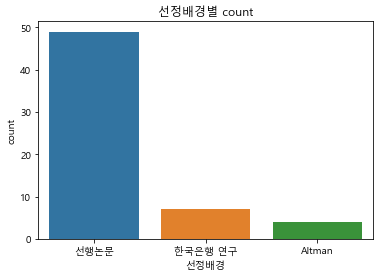

In [13]:
sns.countplot(data=total, x='선정배경').set_title('선정배경별 count')

Text(0.5, 1.0, '선정배경별 count')

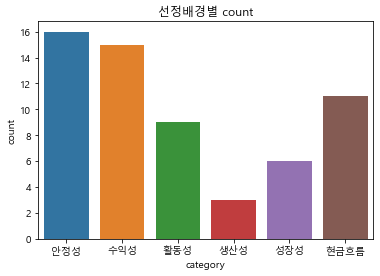

In [14]:
sns.countplot(data=total, x='category').set_title('선정배경별 count')

# Lasso 

## lasso 30

In [17]:
lasso_30 = lasso_30.sort_values('rank').reset_index(drop=True)
lasso_30[['category', 'name', 'abs_coef', 'rank']]

,category,name,abs_coef,rank
0,수익성,경영자본순이익률,3.238650e-04,1
1,수익성,총자본순이익률,2.651627e-04,2
2,안정성,부채구성비율,1.652219e-04,3
3,안정성,비유동장기적합률,8.428889e-05,4
4,생산성,총자본투자효율,8.120343e-05,5
5,안정성,순운전자본비율,6.716573e-05,6
6,현금흐름,매출채권회수기간,3.097791e-05,7
7,안정성,비유동비율,2.510553e-05,8
8,안정성,부채비율,1.443582e-05,9
9,안정성,유동부채비율,1.225604e-05,10


In [26]:
# lasso 최종 df
lasso_30 = lasso_30[['category','name', 'rank']]
lasso_30

,category,name,rank
0,수익성,경영자본순이익률,1
1,수익성,총자본순이익률,2
2,안정성,부채구성비율,3
3,안정성,비유동장기적합률,4
4,생산성,총자본투자효율,5
5,안정성,순운전자본비율,6
6,현금흐름,매출채권회수기간,7
7,안정성,비유동비율,8
8,안정성,부채비율,9
9,안정성,유동부채비율,10


Text(0.5, 1.0, 'Lasso 선정 30개 feature 지표별 count')

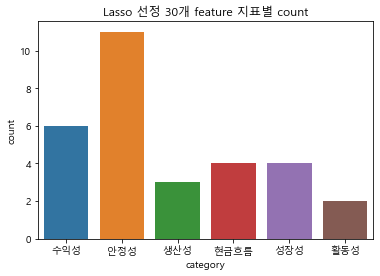

In [98]:
sns.countplot(data=lasso_30, x='category').set_title('Lasso 선정 30개 feature 지표별 count')

## lasso 60

In [25]:
lasso_60 = pd.read_csv(r'..\..\..\Code\SH\2. feature selection\lasso_60.csv', index_col=0)

In [35]:
lasso_60 = lasso_60[['category', 'name', 'abs_coef', 'rank']]
lasso_60['rank'] = lasso_60[['category', 'name', 'abs_coef', 'rank']]['abs_coef'].rank(method='min', ascending=False, na_option='top').astype(int)
lasso_60['rank'] = lasso_60['rank'].replace({31:'-'})
lasso_60

C:\Users\user\AppData\Local\Temp/ipykernel_8800/347770771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lasso_60['rank'] = lasso_60[['category', 'name', 'abs_coef', 'rank']]['abs_coef'].rank(method='min', ascending=False, na_option='top').astype(int)
C:\Users\user\AppData\Local\Temp/ipykernel_8800/347770771.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lasso_60['rank'] = lasso_60['rank'].replace({31:'-'})


,category,name,abs_coef,rank
0,안정성,유동비율,0.000000e+00,-
1,안정성,당좌비율,6.669630e-11,29
2,안정성,유동부채비율,1.225604e-05,10
3,안정성,비유동비율,2.510553e-05,8
4,안정성,순운전자본비율,6.716573e-05,6
5,안정성,부채비율,1.443582e-05,9
6,안정성,차입금의존도,0.000000e+00,-
7,안정성,비유동장기적합률,8.428889e-05,4
8,안정성,매출채권_대_매입채무비율,1.351565e-08,25
9,수익성,자기자본순이익률,7.044382e-06,12


# ANOVA 36

In [38]:
anova = pd.read_csv(r'..\..\..\Code\SH\연습\임시.csv', index_col=0)

In [40]:
anova['category'] = lasso_60['category']

In [44]:
anova = anova[['category','name', 'ANOVA p-value', 't-test', 'p-value', '유의수준']]

In [46]:
anova.sort_values('t-test')

,category,name,ANOVA p-value,t-test,p-value,유의수준
0,안정성,유동비율,6.702925e-01,등분산,6.905907e-01,False
25,활동성,유형자산회전율,7.220607e-01,등분산,8.918445e-01,False
26,생산성,설비투자효율,8.115887e-01,등분산,1.473986e-14,True
28,성장성,자기자본증가율,6.483371e-02,등분산,6.085635e-01,False
30,성장성,영업이익증가율,9.953955e-01,등분산,1.784379e-01,False
31,성장성,순이익증가율,2.951323e-01,등분산,5.646200e-01,False
32,성장성,유형자산증가율,9.869204e-01,등분산,8.981033e-01,False
33,성장성,유동자산증가율,4.944894e-01,등분산,6.869107e-01,False
38,안정성,자본잉여금비율,2.646552e-01,등분산,1.582430e-23,True
40,수익성,이자보상비율,6.337592e-01,등분산,6.313302e-01,False


# 최종변수 상관관계 

In [104]:
df = pd.read_csv(r'..\..\..\Data\최종데이터셋\finaldataset_ver7.6.csv')

In [105]:
col_list = ['EBITDA단기차입비율', '경영자본순이익률','당좌비율', '매출채권회수기간', '부가가치율', '부채구성비율','부채비율','비유동비율','비유동장기적합률',
            '설비투자효율','순운전자본비율','유동부채비율','자기자본순이익률','재고자산보유기간','총자본순이익률','총자본투자효율']

In [108]:
df[col_list].corr()

,EBITDA단기차입비율,경영자본순이익률,당좌비율,매출채권회수기간,부가가치율,부채구성비율,부채비율,비유동비율,비유동장기적합률,설비투자효율,순운전자본비율,유동부채비율,자기자본순이익률,재고자산보유기간,총자본순이익률,총자본투자효율
EBITDA단기차입비율,1.000000,0.021744,0.000175,-0.005443,0.002378,-0.018011,-0.002625,-0.002473,-0.015099,0.000284,0.027258,-0.002865,0.012856,-0.003069,0.027443,0.012416
경영자본순이익률,0.021744,1.000000,0.001091,-0.042093,0.058938,-0.263351,-0.036607,-0.030105,-0.118311,0.052914,0.248692,-0.041774,0.352758,-0.017318,0.815490,0.397691
당좌비율,0.000175,0.001091,1.000000,-0.000880,-0.001533,-0.018524,-0.001904,-0.001866,-0.013437,-0.000582,0.030137,-0.002219,0.000811,-0.001502,0.000805,-0.001071
매출채권회수기간,-0.005443,-0.042093,-0.000880,1.000000,-0.000430,0.001930,0.002392,0.000542,0.006539,0.001877,0.014360,0.003317,-0.049359,0.433374,-0.060968,-0.023852
부가가치율,0.002378,0.058938,-0.001533,-0.000430,1.000000,-0.028291,0.000182,0.000767,0.008721,0.002209,0.007009,-0.000005,0.014205,-0.048521,0.070101,0.035843
부채구성비율,-0.018011,-0.263351,-0.018524,0.001930,-0.028291,1.000000,0.087599,0.064917,0.204942,-0.269408,-0.783397,0.091497,-0.089351,0.007499,-0.342960,-0.354001
부채비율,-0.002625,-0.036607,-0.001904,0.002392,0.000182,0.087599,1.000000,0.965867,0.200467,0.000676,-0.068849,0.926389,-0.094489,0.009150,-0.047701,-0.018809
비유동비율,-0.002473,-0.030105,-0.001866,0.000542,0.000767,0.064917,0.965867,1.000000,0.184490,0.000723,-0.072102,0.876829,-0.084687,0.006376,-0.034717,-0.012137
비유동장기적합률,-0.015099,-0.118311,-0.013437,0.006539,0.008721,0.204942,0.200467,0.184490,1.000000,0.006346,-0.394120,0.266340,-0.198519,0.006217,-0.120707,-0.035636
설비투자효율,0.000284,0.052914,-0.000582,0.001877,0.002209,-0.269408,0.000676,0.000723,0.006346,1.000000,0.250078,0.000719,0.000327,0.000285,0.041471,0.427939


C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

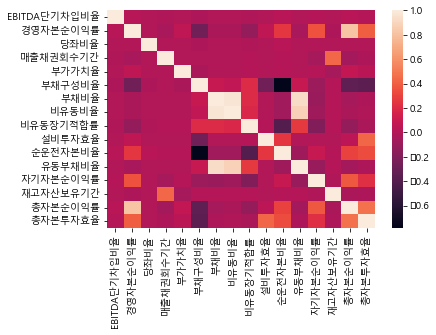

In [107]:
sns.heatmap(df[col_list].corr())

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:title={'center':'Correlation of Features'}>

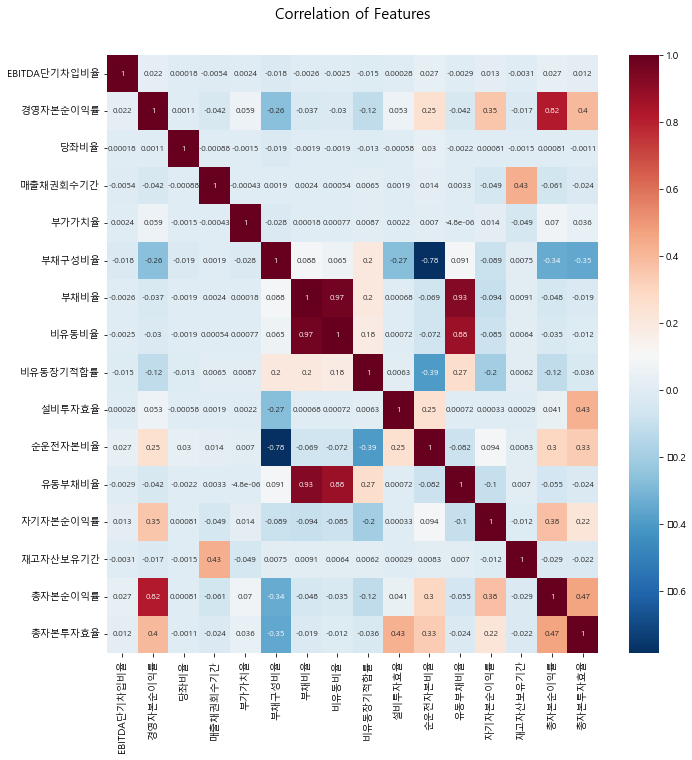

In [109]:
cor = df[col_list].corr()
plt.rcParams['font.family'] = 'malgun gothic'
plt.rcParams['figure.figsize'] = (11, 11) #그림사이즈 지정
plt.title("Correlation of Features", y = 1.05, size = 15)
sns.heatmap(cor, cmap = 'RdBu_r', linecolor = "white", annot = True, annot_kws = {"size" : 8})